In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [2]:
filename = "https://raw.githubusercontent.com/DiahLisdianti/uts-textmining-0015/main/review_tanpa_preprocessing.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,restaurant_name,name,rating,review
0,Martabak Rizky Moro Sekaran,falakhul auliya,5.0,Yummy
1,Martabak Rizky Moro Sekaran,bahrudin yusuf,5.0,(Translated by Google) This is one of the deli...
2,Martabak Rizky Moro Sekaran,irkhamudin Pandhawa,5.0,(Translated by Google) Martabak egg and sweet ...
3,Martabak Rizky Moro Sekaran,A R,5.0,(Translated by Google) Sweet martabak and eggs...
4,Martabak Rizky Moro Sekaran,Sismono Gbs,5.0,(Translated by Google) Available at shopeefood...
...,...,...,...,...
245,Martabak dan Kue Bandung 7 Saudara,Pur Wono,5.0,NaN
246,Martabak dan Kue Bandung 7 Saudara,Kaisar Akhmad,4.0,NaN
247,Martabak dan Kue Bandung 7 Saudara,DARREL TOUR&TRAVEL,5.0,NaN
248,Martabak dan Kue Bandung 7 Saudara,haryo bintang,5.0,NaN


In [3]:
df.drop(columns = ['restaurant_name', 'name'], inplace = True)

preprocessing data

cleaning text

In [12]:
import string
import re

In [13]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features

In [14]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,rating,review,cleaned_review,label,review_len,punct
0,5.0,Yummy,yummy,1,5,0.0
1,5.0,(Translated by Google) This is one of the deli...,translated by google this is one of the deli...,1,252,11.9
2,5.0,(Translated by Google) Martabak egg and sweet ...,translated by google martabak egg and sweet ...,1,552,4.7
3,5.0,(Translated by Google) Sweet martabak and eggs...,translated by google sweet martabak and eggs...,1,164,3.7
4,5.0,(Translated by Google) Available at shopeefood...,translated by google available at shopeefood...,1,176,5.7
...,...,...,...,...,...,...
245,5.0,NaN,nan,1,3,0.0
246,4.0,NaN,nan,1,3,0.0
247,5.0,NaN,nan,1,3,0.0
248,5.0,NaN,nan,1,3,0.0


Tokenization

In [15]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens
0,5.0,Yummy,yummy,1,5,0.0,[yummy]
1,5.0,(Translated by Google) This is one of the deli...,translated by google this is one of the deli...,1,252,11.9,"[translated, by, google, this, is, one, of, th..."
2,5.0,(Translated by Google) Martabak egg and sweet ...,translated by google martabak egg and sweet ...,1,552,4.7,"[translated, by, google, martabak, egg, and, s..."
3,5.0,(Translated by Google) Sweet martabak and eggs...,translated by google sweet martabak and eggs...,1,164,3.7,"[translated, by, google, sweet, martabak, and,..."
4,5.0,(Translated by Google) Available at shopeefood...,translated by google available at shopeefood...,1,176,5.7,"[translated, by, google, available, at, shopee..."


In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [17]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5.0,Yummy,yummy,1,5,0.0,[yummy],yummy
1,5.0,(Translated by Google) This is one of the deli...,translated by google this is one of the deli...,1,252,11.9,"[translated, by, google, this, is, one, of, th...",translated google one delicious martabak unnes...
2,5.0,(Translated by Google) Martabak egg and sweet ...,translated by google martabak egg and sweet ...,1,552,4.7,"[translated, by, google, martabak, egg, and, s...",translated google martabak egg sweet martabak ...
3,5.0,(Translated by Google) Sweet martabak and eggs...,translated by google sweet martabak and eggs...,1,164,3.7,"[translated, by, google, sweet, martabak, and,...",translated google sweet martabak egg taste gre...
4,5.0,(Translated by Google) Available at shopeefood...,translated by google available at shopeefood...,1,176,5.7,"[translated, by, google, available, at, shopee...",translated google available shopeefood grabdfo...


step 3

In [18]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 250 rows and 8 columns
rating 1.0 = 11 rows
rating 2.0 = 3 rows
rating 3.0 = 13 rows
rating 4.0 = 49 rows
rating 5.0 = 174 rows


Number of null in label: 0
Number of null in text: 77


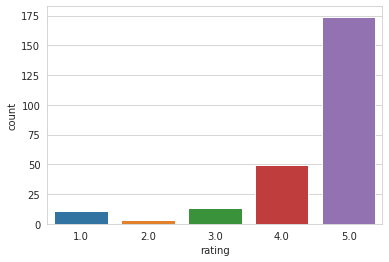

In [19]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum() }")
sns.countplot(x='rating', data=df);

Visualizing Word Clouds

In [20]:
from wordcloud import WordCloud

In [21]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

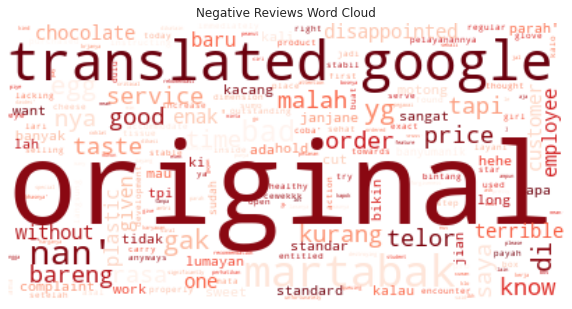

In [22]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

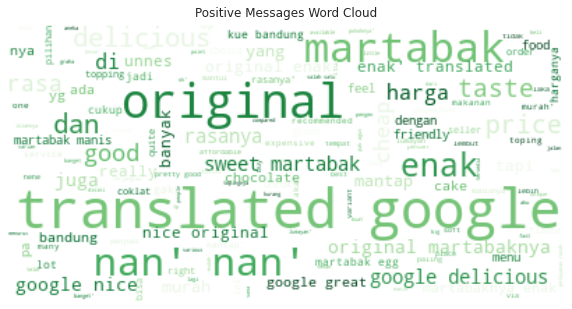

In [23]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [24]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(250, 3)
(250,)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 3)
(75, 3)
(175,)
(75,)


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,124,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.427621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.298292,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.462457,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453335,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.407676,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.377602,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0
2,176,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312107,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.217714,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29755,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.337533,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.217714,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.330875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.210458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312107,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5951,0.0
3,109,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.229332,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.478107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.374545,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.

step 4

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.87      1.00      0.93        65

    accuracy                           0.87        75
   macro avg       0.43      0.50      0.46        75
weighted avg       0.75      0.87      0.80        75



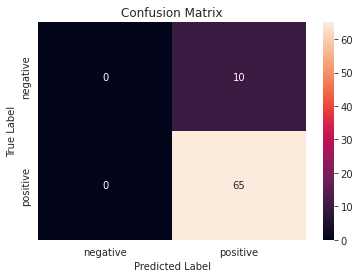

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.87      1.00      0.93        65

    accuracy                           0.87        75
   macro avg       0.43      0.50      0.46        75
weighted avg       0.75      0.87      0.80        75



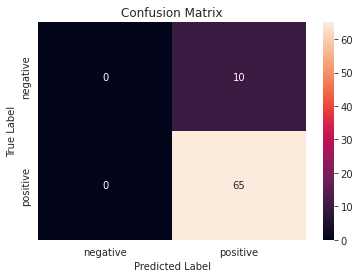

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.86      0.97      0.91        65

    accuracy                           0.84        75
   macro avg       0.43      0.48      0.46        75
weighted avg       0.75      0.84      0.79        75



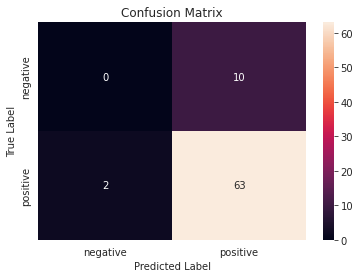

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.86      0.97      0.91        65

    accuracy                           0.84        75
   macro avg       0.43      0.48      0.46        75
weighted avg       0.75      0.84      0.79        75



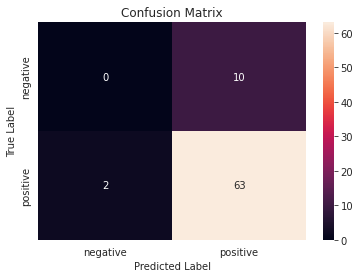

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.86      0.97      0.91        65

    accuracy                           0.84        75
   macro avg       0.43      0.48      0.46        75
weighted avg       0.75      0.84      0.79        75



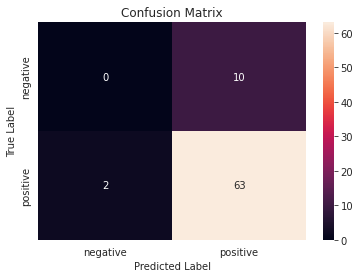

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.87      1.00      0.93        65

    accuracy                           0.87        75
   macro avg       0.43      0.50      0.46        75
weighted avg       0.75      0.87      0.80        75



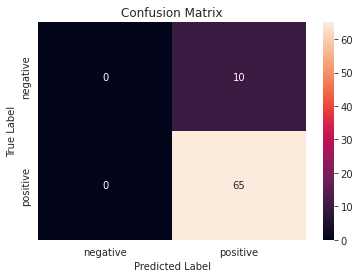

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

step *5*

k = 10

In [35]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.9032679738562092 
 precision - 0.9032679738562092 
 recall - 1.0 
 f1 - 0.9489973262032085 

Logistic Regression
 accuracy - 0.8918300653594772 
 precision - 0.9018790849673202 
 recall - 0.9870833333333333 
 f1 - 0.942361350698637 

Random Forest
 accuracy - 0.9032679738562092 
 precision - 0.9091503267973856 
 recall - 1.0 
 f1 - 0.9520276292335115 

SVM
 accuracy - 0.8977124183006536 
 precision - 0.9026143790849673 
 recall - 0.99375 
 f1 - 0.9457887700534758 

KNN
 accuracy - 0.8980392156862745 
 precision - 0.9129901960784312 
 recall - 0.9808333333333333 
 f1 - 0.9452134006095105 

Extra Trees
 accuracy - 0.9091503267973856 
 precision - 0.9091503267973856 
 recall - 1.0 
 f1 - 0.9520276292335115 



Prediction

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [37]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8666666666666667

In [39]:
data = ["bad", "good", "without","standart"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1]
